In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("car_evaluation.csv")

In [9]:
print(df.head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
# Rename columns for better readability
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names  

# Convert categorical variables to numerical using ordinal encoding
import category_encoders as ce  
encoder = ce.OrdinalEncoder(cols=col_names[:-1])  
df = encoder.fit_transform(df)  

# Check transformed data
print(df.head())


   buying  maint  doors  persons  lug_boot  safety  class
0       1      1      1        1         1       1  unacc
1       1      1      1        1         1       2  unacc
2       1      1      1        1         2       3  unacc
3       1      1      1        1         2       1  unacc
4       1      1      1        1         2       2  unacc


In [12]:
# Define features (X) and target variable (y)
X = df.drop(['class'], axis=1)  
y = df['class']  

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(1208, 6) (519, 6)


In [13]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)  
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [22]:
clf_entropy = DecisionTreeClassifier ()
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
# Predictions using Gini
y_pred_gini = clf_gini.predict(X_test)  

# Predictions using Entropy
y_pred_entropy = clf_entropy.predict(X_test)


In [16]:
#accuracy score
print("Gini Accuracy:", accuracy_score(y_test, y_pred_gini))  
print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))


Gini Accuracy: 0.8015414258188824
Entropy Accuracy: 0.8015414258188824


In [17]:
#CONFUSION MATRIX
print("Confusion Matrix (Gini):\n", confusion_matrix(y_test, y_pred_gini))  
print("Confusion Matrix (Entropy):\n", confusion_matrix(y_test, y_pred_entropy))


Confusion Matrix (Gini):
 [[ 66   0  52   0]
 [ 17   0   0   0]
 [ 11   0 350   0]
 [ 23   0   0   0]]
Confusion Matrix (Entropy):
 [[ 66   0  52   0]
 [ 17   0   0   0]
 [ 11   0 350   0]
 [ 23   0   0   0]]


In [18]:
#classification matrix
print("Classification Report (Gini):\n", classification_report(y_test, y_pred_gini))  
print("Classification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))


Classification Report (Gini):
               precision    recall  f1-score   support

         acc       0.56      0.56      0.56       118
        good       0.00      0.00      0.00        17
       unacc       0.87      0.97      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.80       519
   macro avg       0.36      0.38      0.37       519
weighted avg       0.73      0.80      0.77       519

Classification Report (Entropy):
               precision    recall  f1-score   support

         acc       0.56      0.56      0.56       118
        good       0.00      0.00      0.00        17
       unacc       0.87      0.97      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.80       519
   macro avg       0.36      0.38      0.37       519
weighted avg       0.73      0.80      0.77       519



C:\Users\hom\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hom\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hom\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hom\.conda\en

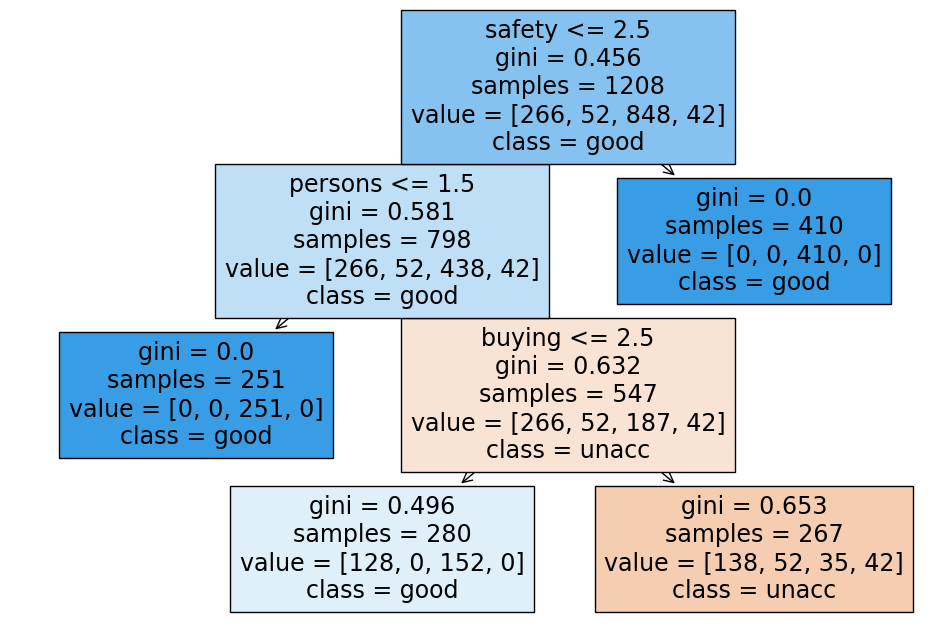

In [19]:
#visualize decision tree
plt.figure(figsize=(12,8))  
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['unacc', 'acc', 'good', 'vgood'])  
plt.show()


In [20]:
#handle overfitting(if needed)
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=10, min_samples_leaf=5)  
clf_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)